# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">  Building Zero Shot Depth Estimation Application Using DPT Model & Gradio
 </center>

Depth estimation is the process of determining the distance of objects from a viewpoint, which is crucial for various applications in computer vision, including autonomous driving, augmented reality, and 3D reconstruction.

This article provides a practical guide to building a zero-shot depth estimation application using the Dense Prediction Transformer (DPT) model and Gradio.

It begins with an introduction to the concepts and importance of depth estimation, followed by a step-by-step setup of the working environment. The article then delves into implementing depth estimation using the DPT model and concludes with instructions on creating an interactive demo using Gradio.

This guide is particularly beneficial for developers, researchers, and machine learning enthusiasts who seek to develop depth estimation applications without requiring extensive datasets or deep technical expertise.

#### <a id="top"></a>
# <div style="box-shadow: rgb(60, 121, 245) 0px 0px 0px 3px inset, rgb(255, 255, 255) 10px -10px 0px -3px, rgb(31, 193, 27) 10px -10px, rgb(255, 255, 255) 20px -20px 0px -3px, rgb(255, 217, 19) 20px -20px, rgb(255, 255, 255) 30px -30px 0px -3px, rgb(255, 156, 85) 30px -30px, rgb(255, 255, 255) 40px -40px 0px -3px, rgb(255, 85, 85) 40px -40px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(60, 121, 245);"><b>Table of contents</b></div>

<div style="background-color: rgba(60, 121, 245, 0.03); padding:30px; font-size:15px; font-family: consolas;">
<ul>
    <li><a href="#1" target="_self" rel=" noreferrer nofollow">1. Introduction to Depth Estimation </a> </li>
    <li><a href="#2" target="_self" rel=" noreferrer nofollow">2. Setting up Working Environment </a></li>
    <li><a href="#3" target="_self" rel=" noreferrer nofollow">3. Depth Estimation using DPT </a></li>
    <li><a href="#4" target="_self" rel=" noreferrer nofollow">4. Building a Demo Using Gardio </a></li>
    
    
</ul>
</div>

***



<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 1. Introduction to Depth Estimation </b></div>


Depth estimation is a computer vision technique used to determine the distance of objects in a scene relative to the camera. This process essentially involves predicting the depth (distance from the camera) for each pixel in an image, thereby enabling the creation of a 3D representation from 2D data. Depth estimation is fundamental to various applications, including autonomous driving, robotics, augmented reality, and 3D scene reconstruction.

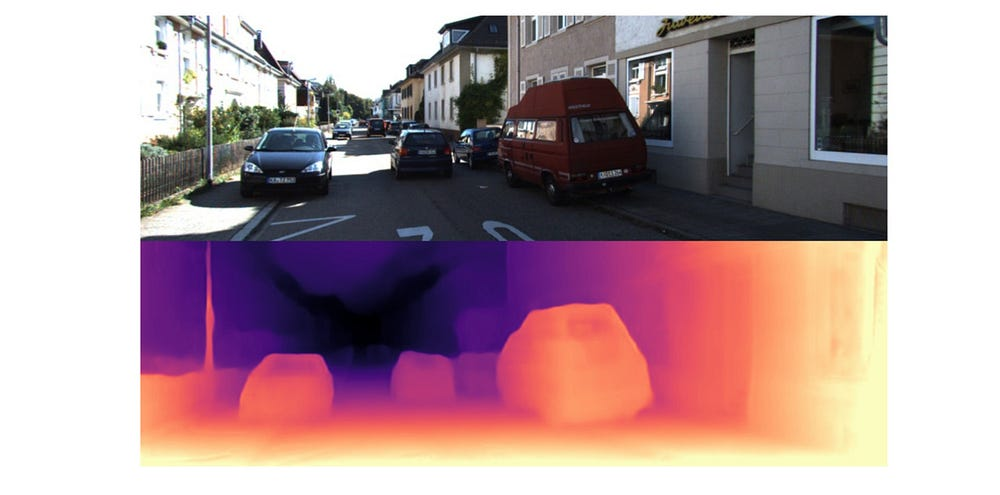

There are six main types of depth estimation, each with its own applications and pros and cons. Let's explore each of them briefly:

**1. Monocular Depth Estimation:**

* **Input**: A single image.
* **Challenge**: This is the hardest form of depth estimation because there is no explicit geometric information about the scene. Instead, it relies on learned features from a dataset where depth information is available.
* **Methods**: Typically involves deep learning models such as Convolutional Neural Networks (CNNs) or Transformers that have been trained on large datasets with depth labels.

**2. Stereo Depth Estimation:**

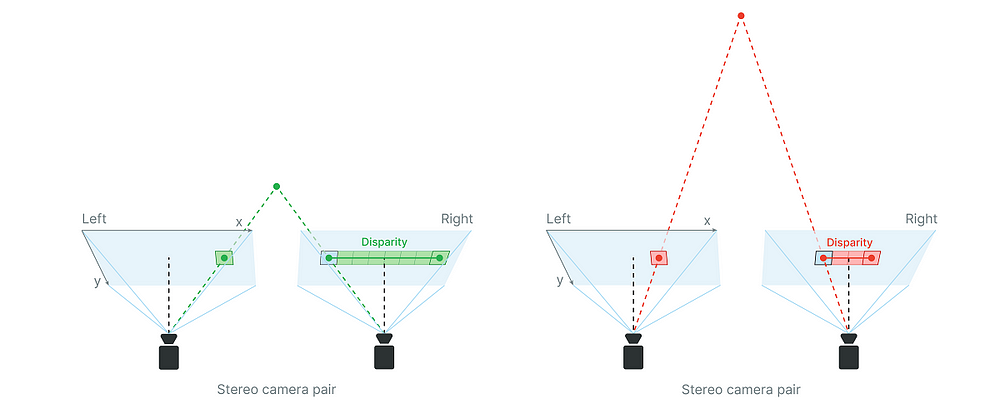

* **Input**: A pair of images taken from slightly different perspectives (similar to human binocular vision).
* **Method**: The process involves matching corresponding points between the two images (stereo matching) and using triangulation to estimate the distance to these points.
* **Challenge**: The main challenge is finding accurate correspondences between the images, especially in textureless or repetitive areas.

**3. Multi-View Stereo (MVS):**
* **Input**: Multiple images taken from different viewpoints.
* **Method**: MVS involves combining depth information from several images to produce a dense 3D reconstruction. It leverages multiple correspondences between images to refine depth estimates.
* **Applications**: Used in photogrammetry, 3D scanning, and structure-from-motion techniques.

**4. Depth from Motion (Structure-from-Motion, SfM):**


* **Input**: A sequence of images from a moving camera.
* **Method**: This technique uses the relative motion between frames to estimate depth. It typically requires estimating both the camera’s motion and the 3D structure simultaneously.
* **Application**: Commonly used in robotics and drone navigation.

**5. Time-of-Flight (ToF) Sensors:**

* **Input**: Directly captures depth information by measuring the time it takes for light (usually infrared) to travel to and return from an object.
* **Advantages**: Provides accurate depth information in real-time.
* **Disadvantages**: It can be expensive and may have issues with reflective or transparent surfaces.

**6. Lidar (Light Detection and Ranging):**


* **Input**: Similar to ToF, Lidar sensors emit laser pulses and measure the time they take to reflect back.
* **Application**: Widely used in autonomous vehicles for precise distance measurement of surrounding objects.

Depth estimation has many practical applications in different domains. Here are some of the applications of it in different domains:

* **Autonomous Driving**: Understanding the environment in 3D helps in object detection, path planning, and obstacle avoidance.
* **Augmented Reality (AR):** Depth estimation enables the placement of virtual objects in the real world, maintaining their position relative to the user’s viewpoint.
* **Robotics**: Robots use depth estimation to navigate environments, avoid obstacles, and interact with objects.
* **3D Reconstruction**: Creating 3D models from 2D images for virtual reality (VR), gaming, and heritage preservation.
* **Medical Imaging**: Depth information is crucial for reconstructing 3D models of anatomical structures from 2D scans.

There are some challenges in Depth Estimation. Here are some of the most important:

* **Occlusions**: Handling areas where one object blocks another from view.
* **Textureless Regions**: Difficulties arise in regions with little to no texture, making it hard to match corresponding points in stereo or multi-view systems.
* **Computational Complexity**: High-resolution depth estimation can be computationally expensive, requiring powerful hardware, especially in real-time applications.
* **Generalization**: Models trained on one type of scene may not generalize well to other types without retraining or fine-tuning.
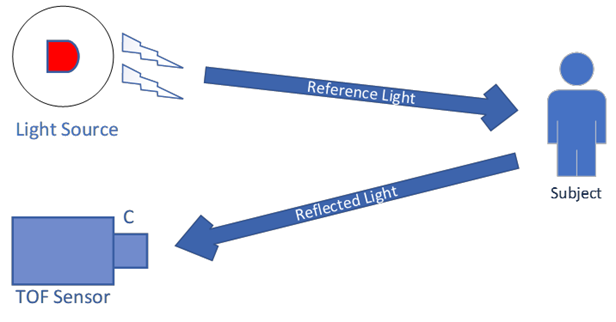
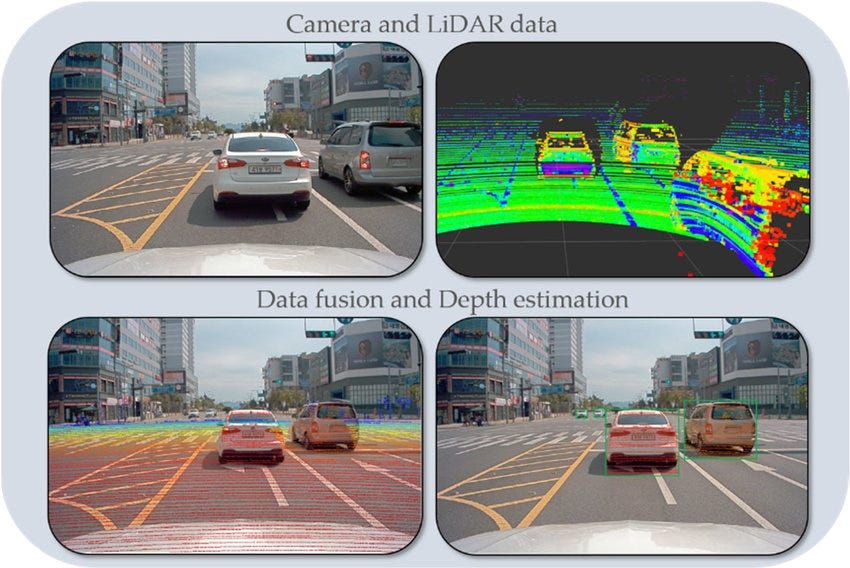

<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 2. Setting up the Working Environment </b></div>

Let’s start by setting up the working environments. First, we will download the packages we will use in this article. We will download the Transformers package, the torch package to use Pytorch, and Gardio for demo deployment of the application.

In [1]:
!pip install transformers -q
!pip install gradio -q
!pip install timm -q 
!pip install torchvision -q

<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 3. Depth Estimation using Dense Prediction TransformersDPT </b></div>


The model that will be used is the [Dense Prediction Transformer (DPT)](https://github.com/isl-org/DPT). The model was introduced in the paper [Vision Transformers for Dense Prediction](https://arxiv.org/abs/2103.13413) by Ranftl et al. (2021) and first released in [isl-org/DPT](https://github.com/isl-org/DPT).

We will start by initializing a depth estimation pipeline using the DPT-Hybrid model from Intel. This model, stored at the path ./models/Intel/dpt-hybrid-midas, is designed to predict depth maps from single images.

The pipeline simplifies the process of setting up and using this model, allowing you to easily apply it to depth estimation tasks.

In [2]:
from transformers import pipeline
depth_estimator = pipeline("depth-estimation", model="Intel/dpt-hybrid-midas")

config.json:   0%|          | 0.00/9.88k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/490M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/382 [00:00<?, ?B/s]

Next, we will load the image and resize it to the following dimensions 806 and 621.

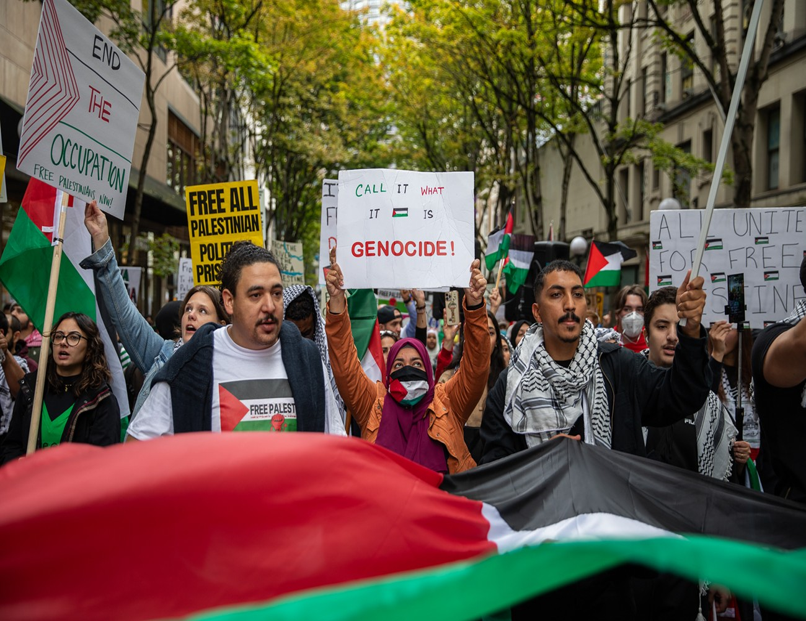

In [3]:
from PIL import Image

raw_image = Image.open('/kaggle/input/palestine-demo-picture/palestine demo.jpg')
raw_image.resize((806, 621))

Next, we will process the raw image by the depth estimation pipeline, and the resulting depth map will be stored in output. This depth map provides a 2D representation of the distance of objects in the image from the camera. When you print or evaluate output, you'll see the depth map or a description of it, depending on how the environment handles such output.

In [4]:
output = depth_estimator(raw_image)
output

{'predicted_depth': tensor([[[ 781.4509,  773.2733,  775.9346,  ...,  214.4252,  212.5703,
            167.9317],
          [ 761.0842,  774.3478,  776.3654,  ...,  214.7692,  211.7176,
            214.0402],
          [ 780.3989,  777.5220,  777.1809,  ...,  215.2409,  213.9116,
            214.5151],
          ...,
          [3135.9436, 3142.6997, 3133.6528,  ..., 2930.2996, 2921.9604,
           2921.4106],
          [3141.9900, 3140.8076, 3141.9387,  ..., 2935.5464, 2939.6594,
           2923.6733],
          [3135.9846, 3143.6650, 3137.9431,  ..., 2964.1797, 2962.6941,
           2956.1946]]]),
 'depth': <PIL.Image.Image image mode=L size=1300x855>}

Next, we will post-process the output image to resize it to the size of the original image.

In [5]:
output["predicted_depth"].shape

torch.Size([1, 384, 384])

Then we will add dimension to the predicted depth map, turning it from a 2D tensor (H, W) into a 3D tensor (H, 1, W). The .shape function then returns the dimensions of this new tensor, allowing you to verify that the operation was performed correctly.

In [6]:
output["predicted_depth"].unsqueeze(1).shape


torch.Size([1, 1, 384, 384])

Then we will resize the predicted depth map to match the size of the original input image (raw_image). The interpolation is performed using bicubic interpolation, which is known for its smooth and high-quality results.

The resulting tensor prediction will have a shape that corresponds to (1, height, width) of the original image, where height and width match those of raw_image. By calling prediction.shape, you verify that the resizing has produced a tensor with the expected dimensions.

In [7]:
import torch

prediction = torch.nn.functional.interpolate(
    output["predicted_depth"].unsqueeze(1),
    size=raw_image.size[::-1],
    mode="bicubic",
    align_corners=False,
)
prediction.shape

torch.Size([1, 1, 855, 1300])

Next, we will be reversing the size order is necessary because the interpolate function expects the target size as, not (width, height). This ensures that the depth map is resized correctly to match the dimensions of the original image.

In [8]:
raw_image.size[::-1]


(855, 1300)

Finally, we will print the predictions

In [9]:
prediction

tensor([[[[ 784.8240,  784.0588,  781.3159,  ...,  173.5533,  161.0430,
            157.4185],
          [ 778.5451,  778.2062,  776.9453,  ...,  182.8468,  173.4258,
            170.6891],
          [ 765.5486,  766.0776,  767.8296,  ...,  200.2889,  196.7099,
            195.6513],
          ...,
          [3140.3462, 3140.4316, 3140.7324,  ..., 2938.8889, 2935.1794,
           2934.1414],
          [3136.3130, 3136.7656, 3138.4778,  ..., 2953.1008, 2951.0391,
           2950.4402],
          [3134.3745, 3135.0051, 3137.3979,  ..., 2960.8279, 2959.5134,
           2959.1147]]]])

Finally, we will normalize the predicted tensors (between 0 and 255) so that they can be displayed.

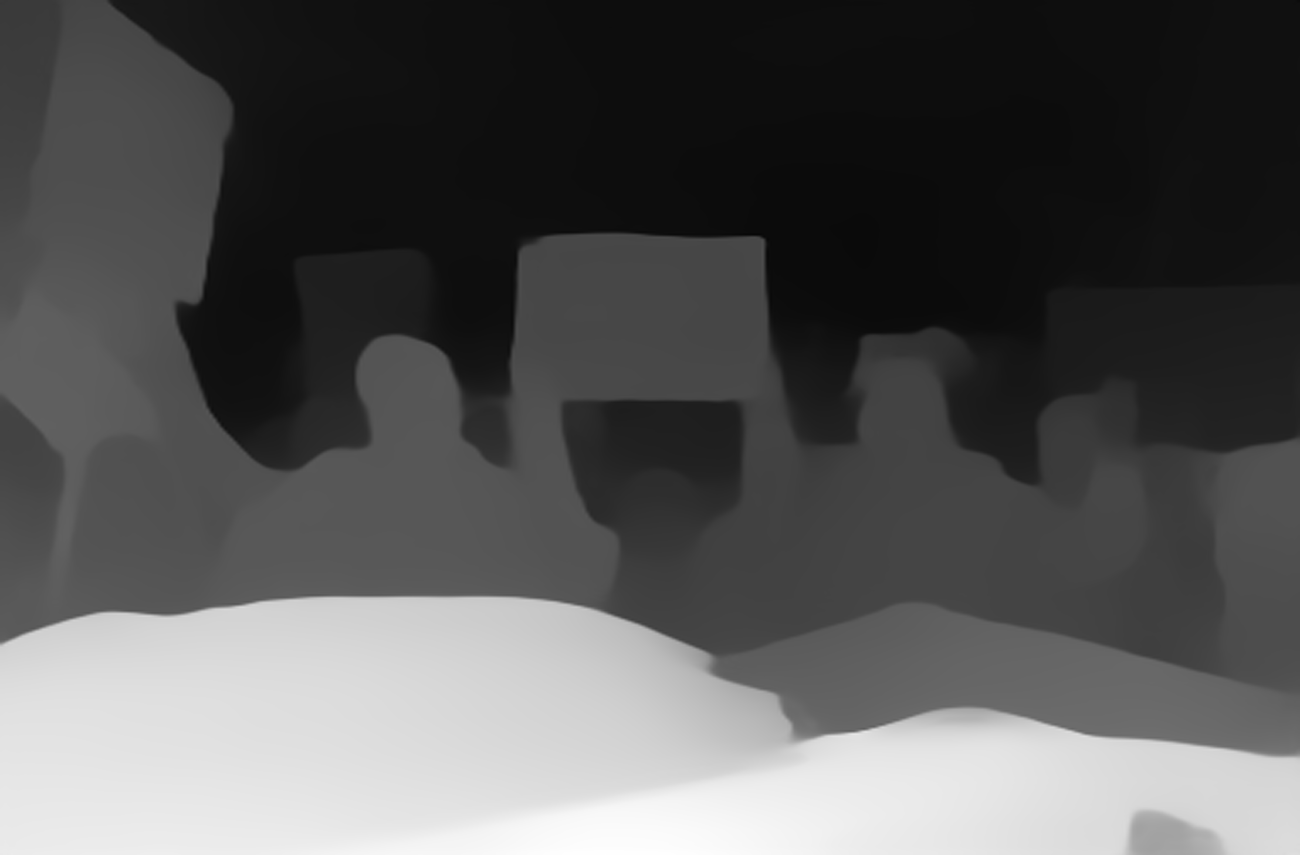

In [10]:
import numpy as np

output = prediction.squeeze().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)
depth

<a id="4"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 4. Building a Demo Using Gardio </b></div>

The next step is to build a demo for this application using Gardio. We will start by importing the required packages and libraries.

In [11]:
import os
import gradio as gr
from transformers import pipeline


Then we will define the launch function which will be the core of our application. The **launch** function takes an input image, applies depth estimation to generate a depth map, resizes this map to the same dimensions as the input image, and then normalizes and formats the map into a grayscale image.

This grayscale image can be used for visualization, where brighter pixels indicate objects closer to the camera and darker pixels indicate objects further away.


In [12]:
def launch(input_image):
    out = depth_estimator(input_image)
    # resize the prediction
    prediction = torch.nn.functional.interpolate(
        out["predicted_depth"].unsqueeze(1),
        size=input_image.size[::-1],
        mode="bicubic",
        align_corners=False,
    )
    
    # normalize the prediction
    output = prediction.squeeze().numpy()
    formatted = (output * 255 / np.max(output)).astype("uint8")
    depth = Image.fromarray(formatted)
    return depth


Next, we will set up the Gradio interface for the launch function, allowing users to upload an image and receive a depth map as the output. The interface is hosted on a specific server port, and by setting share=True, the application will be accessible via a public link, making it easy to share the tool with others.

This setup is particularly useful for deploying machine learning models as interactive web apps without needing extensive web development knowledge.

In [13]:
# iface = gr.Interface(launch, 
#                      inputs=gr.Image(type='pil'), 
#                      outputs=gr.Image(type='pil'))
# iface.launch(share=True, server_port=int(os.environ['PORT1']))

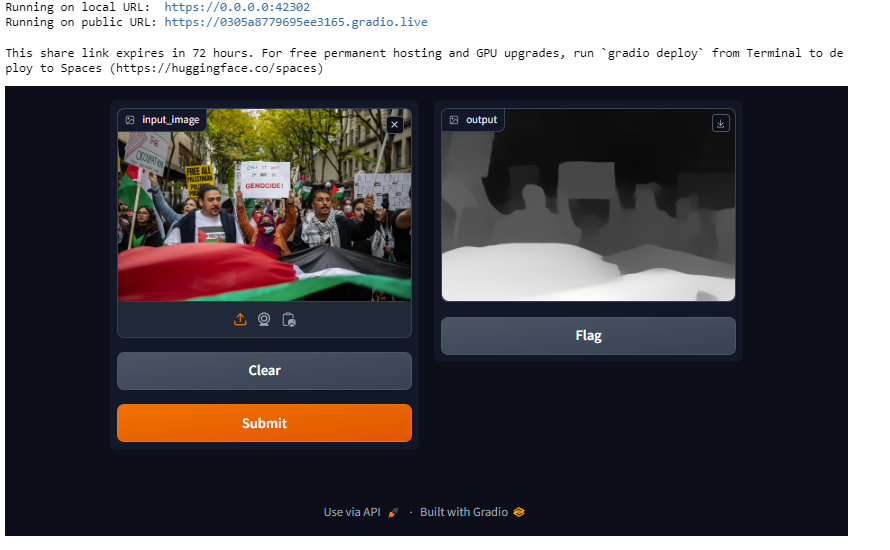

As we can see we will have a simple interface as shown in which you will be able to load the image and generate a depth estimation mask. Finally, remember to close the Gardio application after you finish.